<a href="https://colab.research.google.com/github/yohan20-coder/Analisis-Sentimen-Endeime-Algoritma-Naive-Bayes/blob/main/Sentimen-Analisis-Pembaharuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. TAHAP IMPORT LIBRARI**

In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [2]:
# ==========================
# 1. Import Library
# ==========================
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## **2. TAHAP LOAD DATASET**

In [3]:
# Load CSV
df = pd.read_csv("/content/sample_data/endeisme_dataset_sentimen.csv")

print("Jumlah data sebelum cleaning:", len(df))
print(df.head())

# ==========================
# Bersihkan Data
# ==========================
# Hapus baris yang semua kolomnya NaN
df = df.dropna(how="all")

# Isi NaN di kolom text dan label
df['text'] = df['text'].fillna('')
df['label'] = df['label'].fillna('netral')

# Normalisasi label (hilangkan spasi, huruf kecil semua)
df['label'] = df['label'].astype(str).str.strip().str.lower()

# ==========================
# Cek Label Unik
# ==========================
print("\nLabel unik yang ditemukan di dataset:")
print(df['label'].unique())

# ==========================
# Distribusi Label
# ==========================
# Pastikan semua label muncul (meskipun jumlah 0)
label_order = ["positif", "negatif", "netral"]
df['label'] = pd.Categorical(df['label'], categories=label_order)

print("\nDistribusi Label:")
print(df['label'].value_counts().reindex(label_order, fill_value=0))

Jumlah data sebelum cleaning: 103
                                                                  text  \
Motif tenun ikat Flores sangat indah dan unik        saya suka sekali.   
Kualitas kain tenun Flores kurang halus menurut...             negatif   
Tenun ikat Ende cocok dipakai untuk acara resmi         sangat elegan.   
Harga pakaian tenun terlalu mahal dibanding kua...             negatif   
Tenun khas Flores memiliki nilai budaya tinggi             luar biasa.   

                                                      label  
Motif tenun ikat Flores sangat indah dan unik       positif  
Kualitas kain tenun Flores kurang halus menurut...      NaN  
Tenun ikat Ende cocok dipakai untuk acara resmi     positif  
Harga pakaian tenun terlalu mahal dibanding kua...      NaN  
Tenun khas Flores memiliki nilai budaya tinggi      positif  

Label unik yang ditemukan di dataset:
['positif' 'netral' 'negatif']

Distribusi Label:
label
positif     5
negatif     1
netral     97
Name: count,

## **3. TAHAP PREPOCESSING DATA**

In [5]:
# Buat stemmer dan stopword remover
stemmer = StemmerFactory().create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus spasi berlebih (termasuk di tengah kalimat)
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenisasi manual
    tokens = text.split()
    # Stopword removal
    tokens = [w for w in tokens if w not in stopwords]
    # Stemming
    tokens = [stemmer.stem(w) for w in tokens]
    return ' '.join(tokens)

# Terapkan preprocessing
df["clean_text"] = df["text"].apply(preprocess)

print("\nHasil Preprocessing:")
print(df[["text", "clean_text"]].head())

# ==========================
# TF-IDF
# ==========================
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"].astype(str).str.strip().str.lower()  # normalisasi label

# Pastikan label kategori konsisten
label_order = ["positif", "negatif", "netral"]
y = pd.Categorical(y, categories=label_order)

# Split train-test 80:20 (pakai stratify supaya semua label terbagi)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Hasil Preprocessing:
                                                                  text  \
Motif tenun ikat Flores sangat indah dan unik        saya suka sekali.   
Kualitas kain tenun Flores kurang halus menurut...             negatif   
Tenun ikat Ende cocok dipakai untuk acara resmi         sangat elegan.   
Harga pakaian tenun terlalu mahal dibanding kua...             negatif   
Tenun khas Flores memiliki nilai budaya tinggi             luar biasa.   

                                                       clean_text  
Motif tenun ikat Flores sangat indah dan unik         suka sekali  
Kualitas kain tenun Flores kurang halus menurut...        negatif  
Tenun ikat Ende cocok dipakai untuk acara resmi     sangat elegan  
Harga pakaian tenun terlalu mahal dibanding kua...        negatif  
Tenun khas Flores memiliki nilai budaya tinggi         luar biasa  


## **4. TAHAP CLASSIFICATION DENGAN ALGORITMA NAIVE BAYES**

In [6]:
# ==========================
# 5. Naive Bayes Classification
# ==========================
model = MultinomialNB()
model.fit(X_train, y_train)
# Prediksi
y_pred = model.predict(X_test)
print(model)


MultinomialNB()


## **5. TAHAP EVALUASI**


Akurasi: 0.8571428571428571

Classification Report:
              precision    recall  f1-score   support

     positif     0.8571    1.0000    0.9231        18
      netral     0.0000    0.0000    0.0000         3

    accuracy                         0.8571        21
   macro avg     0.4286    0.5000    0.4615        21
weighted avg     0.7347    0.8571    0.7912        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


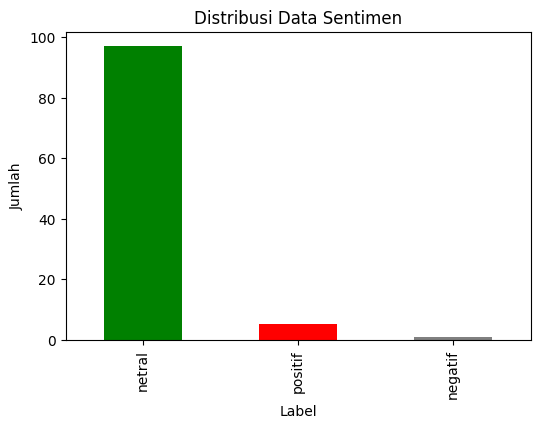

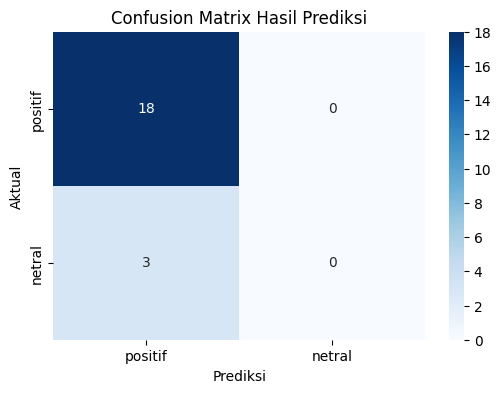

In [7]:
# ==========================
# 6. Evaluasi
# ==========================
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")

# Get the unique labels present in y_test
unique_labels_in_test = y_test.unique()

# Filter target_names to include only the unique labels in y_test
filtered_target_names = [label for label in ["positif","negatif","netral"] if label in unique_labels_in_test]

print(classification_report(y_test, y_pred, digits=4, labels=unique_labels_in_test, target_names=filtered_target_names))

# ==========================
# 6a. Visualisasi Distribusi Label
# ==========================
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title("Distribusi Data Sentimen")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

# ==========================
# 6b. Confusion Matrix
# ==========================
# Use the unique labels in y_test for the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels_in_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=filtered_target_names,
            yticklabels=filtered_target_names)
plt.title("Confusion Matrix Hasil Prediksi")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

## **6. PRESENTASE DISTRIBUSI**

In [8]:
# ==========================
# 6c. Persentase Distribusi Label
# ==========================
label_percentages = df['label'].value_counts(normalize=True) * 100
print("\nPersentase Distribusi Label:")
print(label_percentages.reindex(["positif", "negatif", "netral"], fill_value=0))


Persentase Distribusi Label:
label
positif     4.854369
negatif     0.970874
netral     94.174757
Name: proportion, dtype: float64


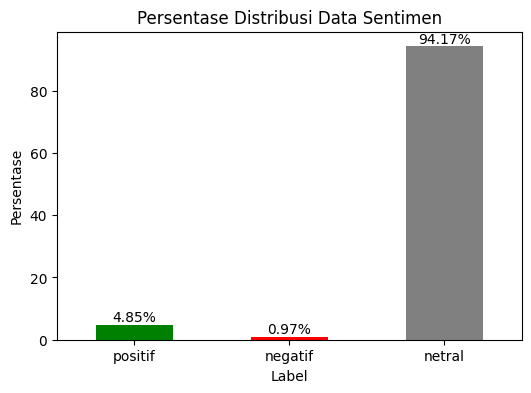

In [9]:
# ==========================
# 6d. Visualisasi Persentase Distribusi Label
# ==========================
plt.figure(figsize=(6,4))
ax = label_percentages.reindex(["positif", "negatif", "netral"], fill_value=0).plot(kind='bar', color=['green','red','gray'])
plt.title("Persentase Distribusi Data Sentimen")
plt.xlabel("Label")
plt.ylabel("Persentase")
plt.xticks(rotation=0)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()